In [1]:
#packages
import pandas as pd
import numpy as np
import random

from xelify import functions as fun
from xelify import algorithms as alg

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import MaxNLocator

random.seed(42)

### Load data

In [2]:
#load the information on the tasks: df_toy.csv
data_task = pd.read_csv('df_toy.csv')

#load the information on the workers: df_hum.csv
data_hum = pd.read_csv('df_hum.csv')

#consider that today is a monday:
work_dict = data_hum['Lundi'].to_dict()
for k,v in work_dict.items():
    work_dict[k] = eval(v)

#### Manipulate data to work with the heuristic

In [3]:
temps_de_passage = data_task['Temps de passage'].to_list()
temps_total = data_task['Temps total'].to_list()
equipement = data_task['Equipement'].to_list()

#separete workers as only one
habilidades_trabajadores = {}
horarios_trabajadores = {}
n = 1
for k,v in work_dict.items():  
    for i in v:
        horarios_trabajadores[n] = i
        n += 1

#data modification for the jackson-bestworker algorithm
num_tareas = len(data_task)
num_trabajadores = len(horarios_trabajadores)
num_maquinas = 3

machine_req = []
for i in equipement:
    machine_req.append([i for i, x in enumerate(i) if x == 1])

tiempos_procesamiento = temps_total
deadlines = temps_de_passage

horarios = fun.Norm_worktimes(horarios_trabajadores) 

### Solve using modified Jackson heuristic

In [4]:
schedule_worker,schedule_machine,to_schedule = alg.Jackson_bw(num_tareas, num_maquinas, num_trabajadores, tiempos_procesamiento, habilidades_trabajadores, horarios, deadlines, machine_req)

task left to schedule:  0


### Plot the scheduling of task for each worker

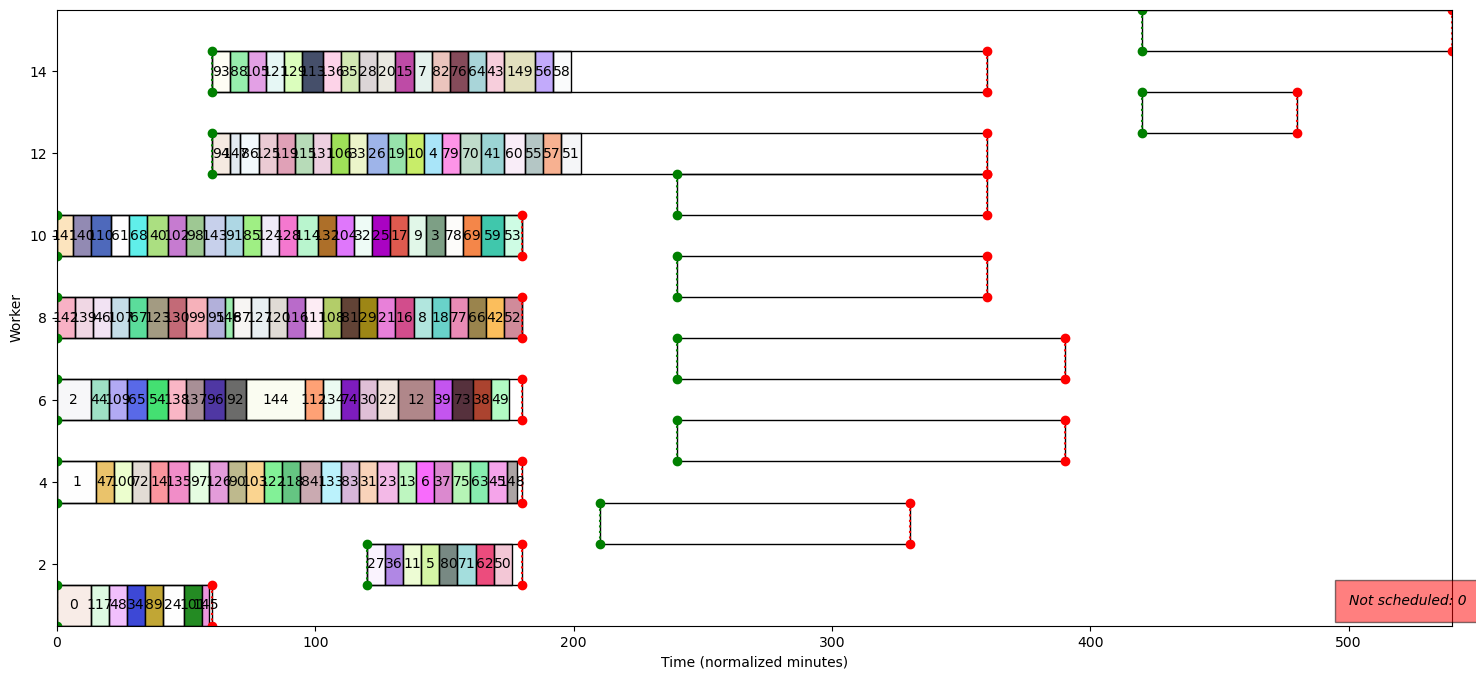

In [5]:
#Now create a plot to see the schedule of each worker
fig, ax = plt.subplots(figsize=(18, 8))

#Create a dictionary with one color by task
colors = {}
for i in range(num_tareas):
    colors[i] = np.random.rand(4,)

#Create a rectangle for each worker
for i in range(1,num_trabajadores+1):
    ax.add_patch(patches.Rectangle((horarios[i][0],i-0.5),horarios[i][1]-horarios[i][0],1,linewidth=1,edgecolor='black',facecolor='none'))
    #Paint the rectangles of the schedule of each worker according to the start (start_time) and end time (end_time) of each task
    for j in schedule_worker[i]:
        start_time = j[2][0]
        end_time = j[2][1]

        #each task is a rectangle with a different color
        ax.add_patch(patches.Rectangle((start_time,i-0.5),end_time-start_time,1,linewidth=1,edgecolor='black',facecolor=colors[j[0]]))
        #add the label inside the rectangle with the number of the task
        ax.text(start_time+(end_time-start_time)/2,i-0.5+0.5,str(j[0]),horizontalalignment='center',verticalalignment='center')

    #Make a red vertical line in dots to indicate the end of the worker time
    ax.plot([horarios[i][1],horarios[i][1]],[i-0.5,i+0.5],color='red',linestyle=':',marker='o')
    #Make a green vertical line in dots to indicate the start of the worker time
    ax.plot([horarios[i][0],horarios[i][0]],[i-0.5,i+0.5],color='green',linestyle=':',marker='o')

#Set the limits of the plot
ax.set_xlim(0, max(deadlines))
ax.set_ylim(0.5, len(horarios_trabajadores)+0.5)

#Set the labels of the plot
ax.set_xlabel('Time (normalized minutes)')
ax.set_ylabel('Worker')


#Only integers in the y axis
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

#Add the right-down corner a box with the len(to_schedule) tasks that could not be scheduled
ax.text(500, 1, 'Not scheduled: '+str(len(to_schedule)), style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.show()